# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



Why did we choose a specific model to present to us e.g higher accuracy score, T-score, precision score, F1 score?
  

In [8]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [9]:
df = pd.read_csv('datasets/data.csv')
df.shape

(6819, 96)

In [10]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [11]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [12]:
y = df['Bankrupt?']
x = df[[' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Net Income to Total Assets',
       ' Operating Gross Margin',
       ' Operating Profit Rate',
       ' Current Ratio', 
       ' Quick Ratio',
       ' Cash/Current Liability',
       ' Liability to Equity',
       ' Debt ratio %',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Cash Flow to Total Assets',
       ' CFO to Assets',
       ' Total Asset Growth Rate',
       ' Net Value Growth Rate',
       ' Total expense/Assets']]

In [13]:
#Splitting of data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#Scaling data since there no categorical or one-hotencoded/binary features
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
# regularization constant (strength)
REG_CONST = 0.01

# Create a model and fit it to the training data.
#(l2 -Ridge Regression here)
# C := inverse of regularization strength 
model = LogisticRegression(penalty='l2', C=1./REG_CONST, max_iter=300)
model.fit(x_train_scaled, y_train)

# Predict the classes of test data and measure the accuracy of test data
y_pred = model.predict(x_test_scaled)
acc = (y_pred == y_test).mean()
print('\nAccuracy of test data = {:.3f}'.format(acc))


Accuracy of test data = 0.963


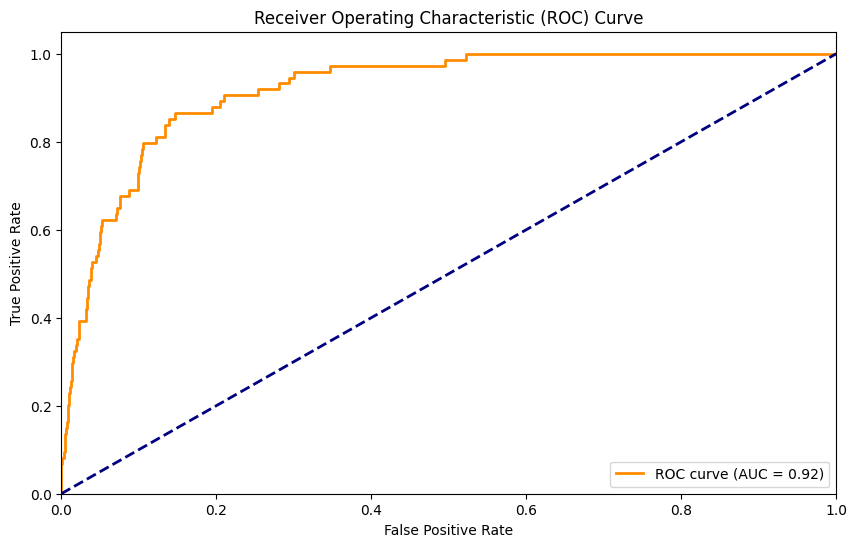

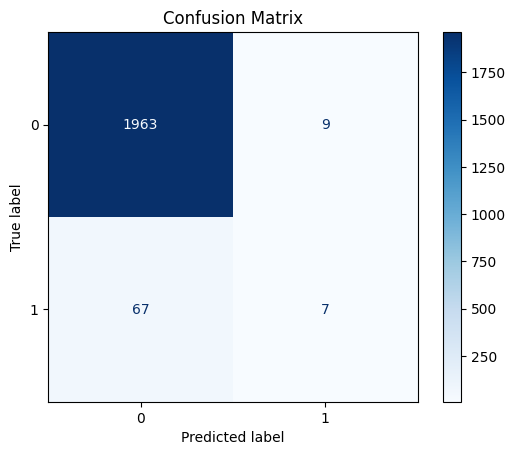

AUC Score: 0.920
F1 Score: 0.156

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1972
           1       0.44      0.09      0.16        74

    accuracy                           0.96      2046
   macro avg       0.70      0.55      0.57      2046
weighted avg       0.95      0.96      0.95      2046



In [15]:
# Get prediction probabilities
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

## Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print AUC score
print(f'AUC Score: {roc_auc:.3f}')
print(f'F1 Score: {f1:.3f}')

# Print Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ROC curve shows model performs well acorss all thresholds

AUC score indicates model is very good at distinguishing between the two classes of bankruptcy and non-bankruptcy

F1 score (0.224) poor due to imbalanced in classes

Since in our case we are predicting whether a company goes bankrupt or not, a false negative is worse in this case 
(e.g if model wrongly predicts your company may go bankrupt (false positive) when you may actually not, it is not as bad as if model wrongly predicts your company MAY NOT go bankrupt(false negative) when you actually are heading towards that trajectory) as it would have not only major financial cost to shareholders or investors but also employees of company 

We will focus on RECALL measure since higher overall cost for false negative

"For instance, lending to a company that will go bankrupt is usually more costly than not lending to a solvent company that is falsely predicted to be in financial distress or go bankrupt. An investor that lends to a company that goes bankrupt can lose up to 100% of their investment, while not lending to a company which remains solvent only causes the opportunity costs of the lost interest" 
("The evaluation of bankruptcy prediction models based on socio-economic costs", Jelena Radovanovic, 2023)

HOWEVER F1 score (0.224) shows that accuracy score (0.96) of model may be misleading as dataset is imbalanced towards minority class (in this case is predicting [1], bankruptcy) which is bad as it does not gurantee good predictions for bankruptcy. High accuracy of model mostly reflects model's ability to predict NON-bankruptcy companies correctly. 

AUC vs F1 score showdown

AUC is good but F1 score is bad here meaning that there is a class imbalance. (Far fewer bankrupt companies [1], than non-bankrupt ones [0])

Model trained to minimize overall error, hence it prioritized CORRECTLY classifying majority class, which is non-bankrupt companies, rather than minority class, bankrupt companies. 
Leads to many BANKRUPT companies being misclassified as non-bankrupt 